# 5.12. Trying the Julia programming language in the Jupyter Notebook

In [1]:
println("Hello world!")

Hello world!


In [2]:
f(z, c) = z.*z .+ c

f (generic function with 1 method)

In [3]:
f(2.0 + 1.0im, 1.0)

4.0 + 4.0im

In [4]:
z = [-1.0 - 1.0im  1.0 - 1.0im;
     -1.0 + 1.0im  1.0 + 1.0im]

2×2 Array{Complex{Float64},2}:
 -1.0-1.0im  1.0-1.0im
 -1.0+1.0im  1.0+1.0im

In [5]:
z[1,end]

1.0 - 1.0im

In [6]:
f(z, 0)

2×2 Array{Complex{Float64},2}:
 0.0+2.0im  0.0-2.0im
 0.0-2.0im  0.0+2.0im

In [7]:
function julia(z, c; maxiter=200)
    for n = 1:maxiter
        if abs2(z) > 4.0
            return n-1
        end
        z = f(z, c)
    end
    return maxiter
end

julia (generic function with 1 method)

In [8]:
Pkg.add("PyCall")
using PyCall

In [9]:
@pyimport numpy as np

In [10]:
z = np.linspace(-1., 1., 100)

100-element Array{Float64,1}:
 -1.0
 -0.979798
 -0.959596
  ⋮
  0.959596
  0.979798
  1.0

In [11]:
m = [julia(z[i], 0.5) for i=1:100]

100-element Array{Int64,1}:
 2
 2
 ⋮
 2
 2

In [12]:
Pkg.add("Gadfly")
using Gadfly

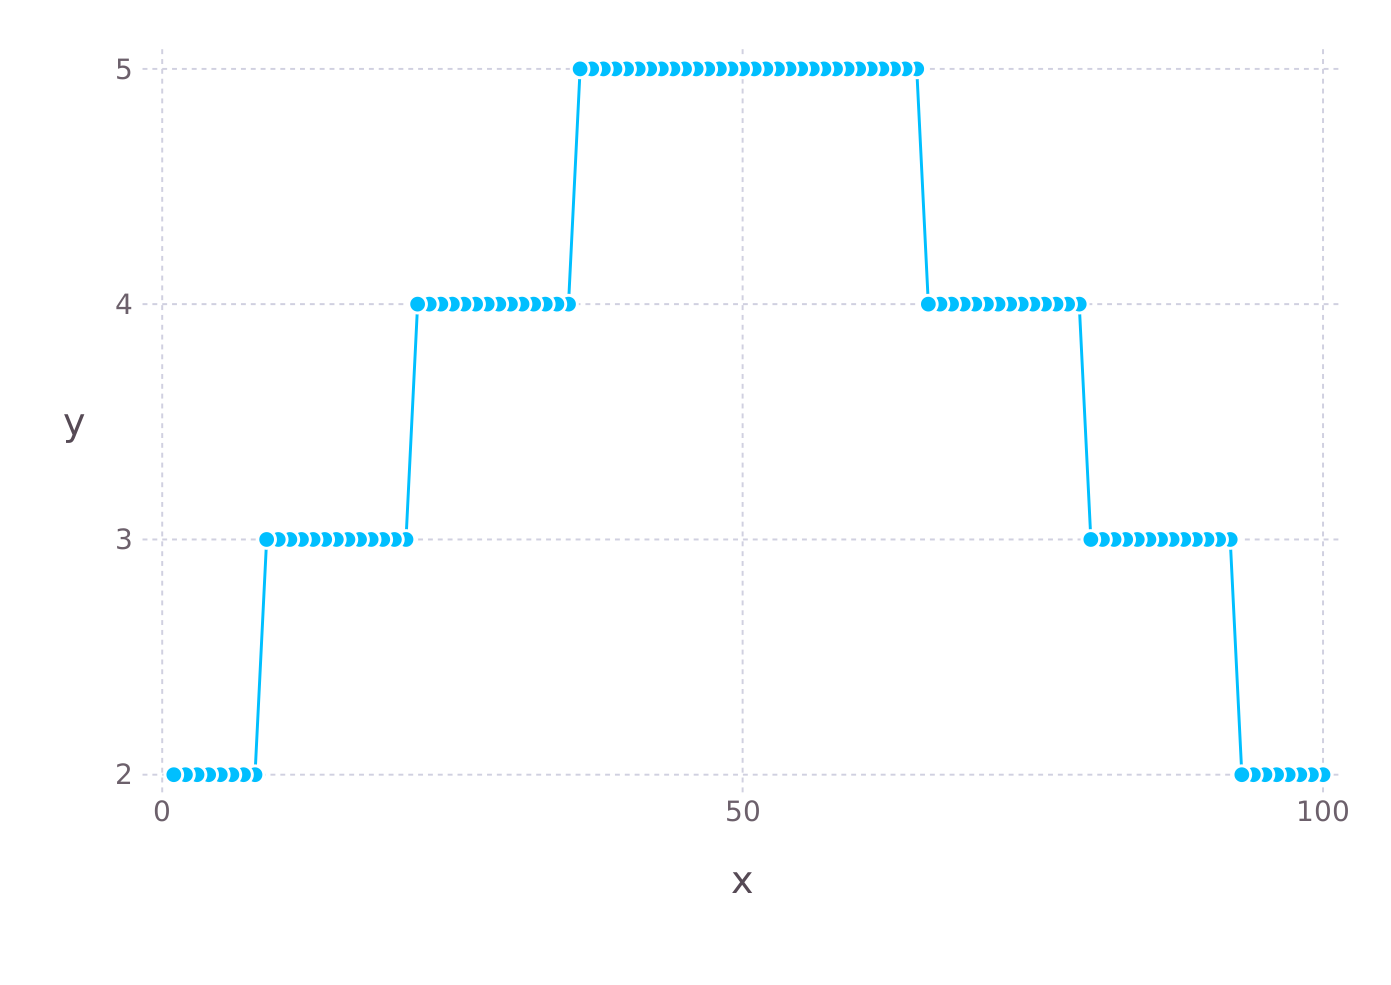

In [13]:
plot(x=1:100, y=m, Geom.point, Geom.line)

In [14]:
@time m = [julia(complex(r, i), complex(-0.06, 0.67))
           for i = 1:-.001:-1,
               r = -1.5:.001:1.5];

  1.99 seconds (12.1 M allocations: 415.8 MiB)


In [15]:
Pkg.add("PyPlot")
using PyPlot

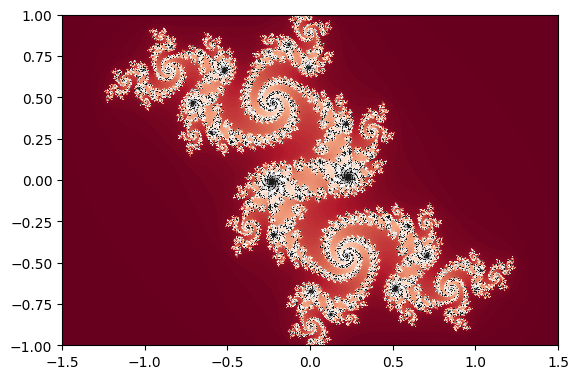

In [16]:
imshow(m, cmap="RdGy",
       extent=[-1.5, 1.5, -1, 1]);